In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

> Aluna: Ana Luisa Fuchs da Silveira

 ## Modelos de Classificação e Regressão Logística -  Desafio Final

### 1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn)

In [2]:
#Importação do dataset em formato de arquivo
iris = pd.read_csv('iris.csv')

> Responda:

#### a. Faça uma análise inicial sobre esse dataset

In [ ]:
#Verificando as primeiras cinco linhas do dataframe
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#A fim de ter uma visão da média, quantidade de itens descritos, desvio padrão, mediana, valores mínimos e máximos.
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


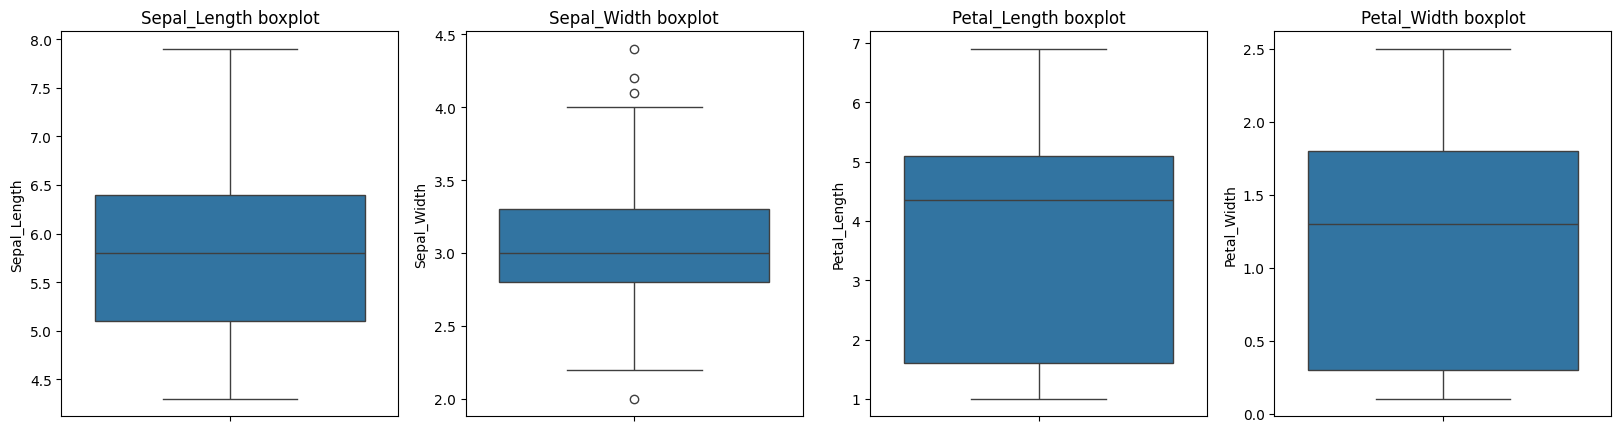

In [3]:
#Forma visual de utilizar os valores dados no describe(), onde verificamos em boxplot a média dos valores de cada parte da planta, independente da espécie
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(iris.columns[:-1]):
    sns.boxplot(y=iris[column], ax=ax[i])
    ax[i].set_title(f'{column} boxplot')

In [ ]:
#Busca de valores nulos ou qual o formato dos dados (float, int, object)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\anafs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


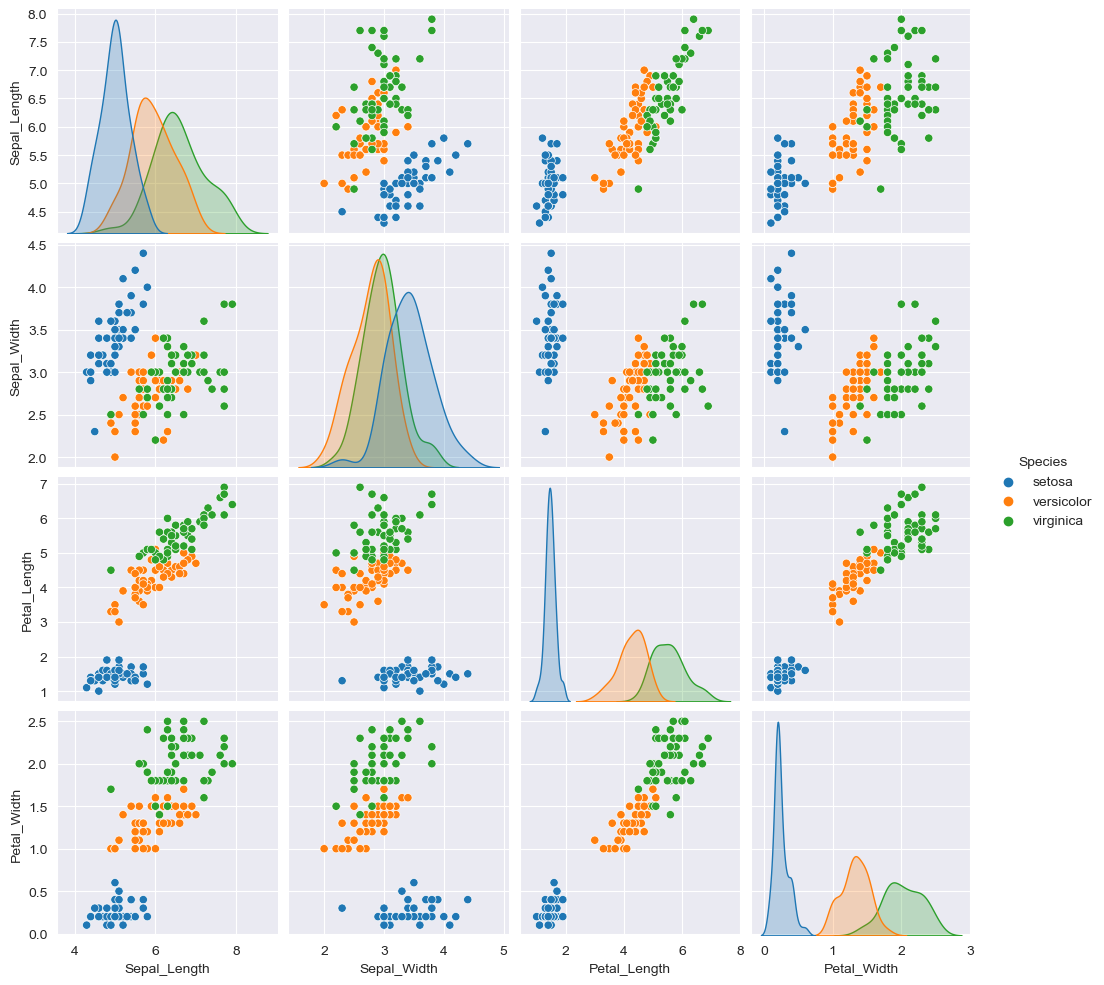

In [ ]:
#A fim de uma análise superficial e inicial, realiza-se o pairplot com diferenciação (hue) por espécies, buscando visualizar padrões iniciais.
sns.pairplot(iris, hue='Species')

#### b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

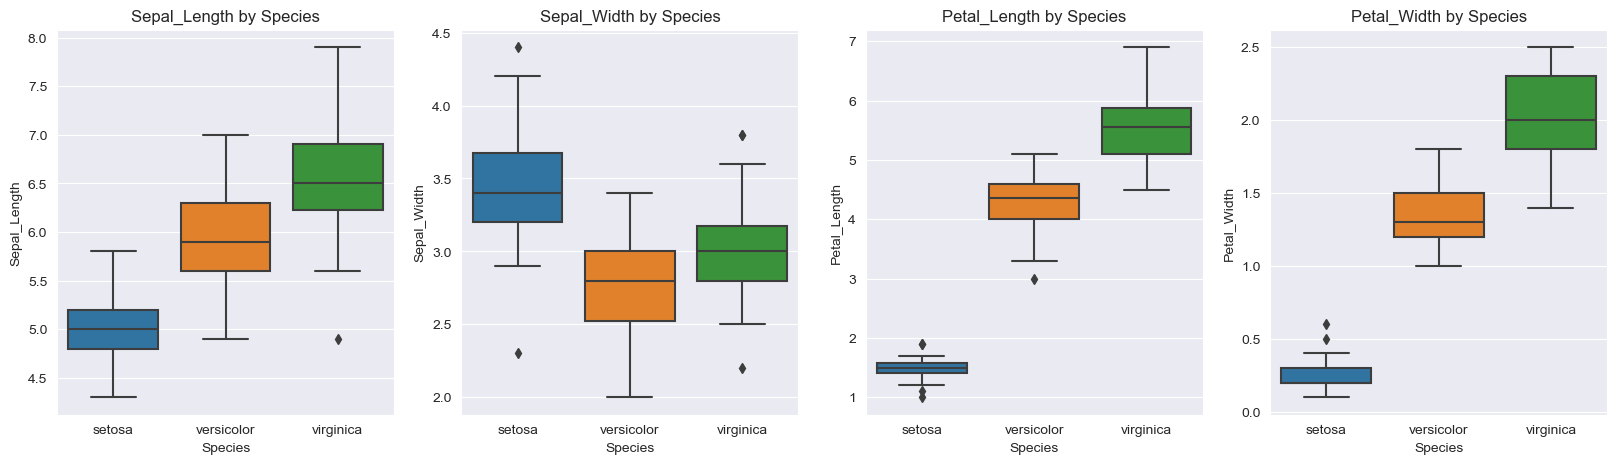

In [ ]:
#Verificação do boxplot e histograma de cada espécie para análise
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(iris.columns[:-1]):
    sns.boxplot(x='Species', y=column, data=iris, ax=ax[i])
    ax[i].set_title(f'{column} by Species')

In [5]:
#Informação semelhante ao boxplot, mas visualmente enxergando os valores máximos e mínimos de cada espécie
iris.groupby(iris['Species']).agg(['max', 'min'])

Sepal_Length      Sepal_Width      Petal_Length      Petal_Width  \
                    max  min         max  min          max  min         max   
Species                                                                       
setosa              5.8  4.3         4.4  2.3          1.9  1.0         0.6   
versicolor          7.0  4.9         3.4  2.0          5.1  3.0         1.8   
virginica           7.9  4.9         3.8  2.2          6.9  4.5         2.5   

                 
            min  
Species          
setosa      0.1  
versicolor  1.0  
virginica   1.4

Ao observar o boxplot em conjunto com o pairplot, é visível que a espécie setosa possui tamanho de pétala (altura e largura) muito inferior às outras espécies, podendo ser essa uma característica crucial para diferenciação de espécies.

<Axes: >

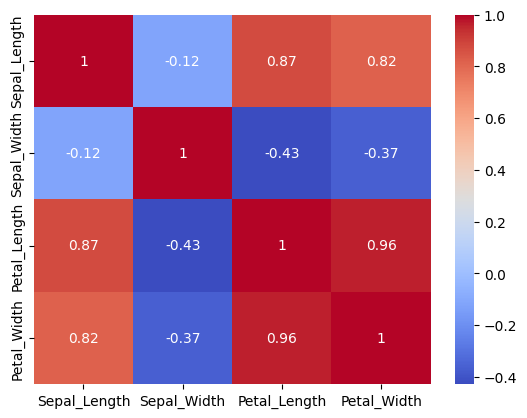

In [4]:
#A fim de utilizar uma análise mais visual, realizaremos a correlação em um heatmap
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
grouped_iris = iris.groupby('Species').mean()
grouped_iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


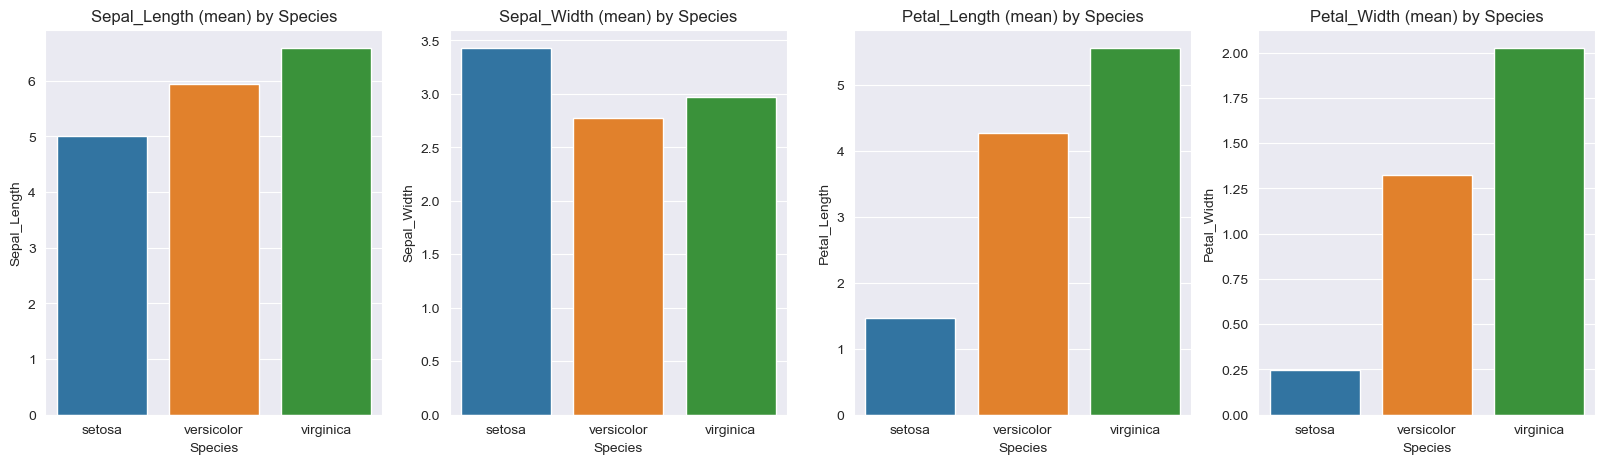

In [ ]:
#A fim de ter uma visualização generalizada, agrupamos as médias dos tamanhos de pétalas e sépalas de cada espécie
# e plotamos em um gráfico de barras.
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(grouped_iris.columns):
    sns.barplot(x=grouped_iris.index, y=grouped_iris[column], ax=ax[i])
    ax[i].set_title(f'{column} (mean) by Species')


#### c. Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?


Ao analisar o pairplot, podemos observar várias situações:

- A espécie setosa possui seu agrupamento amostral muito inferior do que as outras espécies (virginica e versicolor), indicando que possui tamanho de sépala e pétala bem inferior aos das outras espécies.
- Em questão a agrupamento das amostras, a grande maioria dos dados das setosas se acumulam próximo da mediana, indicando uma amostragem com distribuição normal com ligeira assimetria à direita (positiva), já as outras duas espécies indicam possuir uma amostragem com distribuição bimodal ou multimodal.
- As espécies virginicas e versicolor são semelhantes em tamanho de pétala e sépala, mas existe uma ligeira redução do tamanho da versicolor em relação a virgínica, sendo interessante para avaliar se a utilização de regressão logística irá classificar de forma efetiva as diferenças das espécies

Reforçando o que o pairplot já indicou, que os tamanhos de pétalas da setosa são muito inferiores em média ao das duas espécies, podendo ser esta uma informação crucial para diferenciação. E, para a versicolor, observa-se que possui menor valor de pétala igualmente, podendo indicar a utilização desta para a regressão.

Na presença do heatmap, também observa-se que o tamanho das pétalas estão fortemente correlacionados entre si (largura x altura), o que, na hora da análise, pode ser válido observar, visto que a presença do tamanho da pétala indica fortemente a espécie, e a correlação entre eles se justifica já que a pétala mais larga tende a ter maior altura - assim, tendo um tamanho que já se encaixe nas categorias.

A espécie setosa possui os menores valores de pétala, sendo, talvez, apenas esse necessário para identificar - já que a maior pétala catalogada não chega nem próximo do valor de uma pétala de outras espécies. Já em relação a versicolor x virgínica, existe a necessidade de utilizar mais fatores para avaliação - por exemplo, se a pétala + sépala são inferiores, pode ser um indicativo para versicolor.

#### d. Aplique a regressão logística para avaliar o modelo de classificação.

In [ ]:
#Verificação da base de dados, se é balanceada.
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
#Adição de uma variável target de forma numérica para verificar na regressão
iris['target'] = iris['Species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [8]:
#Verificação se o target entrou no dataframe.
iris.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species',
       'target'],
      dtype='object')

In [9]:
#Importação da biblioteca
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris_filtered = iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'target']]

#Criar os vetores X e y com base nos dados
#Sendo: x contem as variaveis explicativas
X = iris_filtered[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]

#e y contem a variável de interesse
y = iris_filtered[['target']]

In [25]:
#Para dividir a amostra em 80% teste e 20% amostra, vamos usar train_test split do pacote sklearn para a separacao dos dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitar o modelo
logreg = LogisticRegression() #Instanciar a classe
logreg.fit(X_train, y_train)

LogisticRegression()

In [17]:
#Aplicação do modelo fitado na base de teste:

y_pred = logreg.predict(X_test) #Aplicação do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] #Previsão da probabilidade

In [23]:
#Adicionando as colunas no teste e mostrando o output da probabilidade e sua previsão:
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_Espécie"] = y_pred_proba

X_test[['Previsao_Modelo', 'Probabilidade_Espécie']]

,Previsao_Modelo,Probabilidade_Espécie
73,1,0.827210
18,0,0.053273
118,2,0.001557
78,1,0.792127
76,1,0.774345
31,0,0.044232
64,1,0.908082
141,2,0.155690
68,1,0.762834
82,1,0.945799


#### e. Calcule a acurácia, precisão e recall.

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Ao utilizar o classification report, ele entrega os valores de forma resumida, sem ter que importar as bibliotecas como acurácia, precisão, recall, etc. E note que a perfeição dos valores (todos em 1.0) dá-se pela amostra ser reduzida e a base de dados ser muito pequena (150 amostras, sendo 50 para cada), o que acaba levando o modelo à perfeição de predição - todavia essa base pequena de dados leva a pouca dispersão de dados e, portanto, a uma predição não tão condizente com a realidade.

#### f. Plote a matriz de confusao com matplotlib ou seaborn

In [14]:
#Bibliotecas para matriz de confusão, cálculo da acurácia, precisão e recall, para utilizar ao invés
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

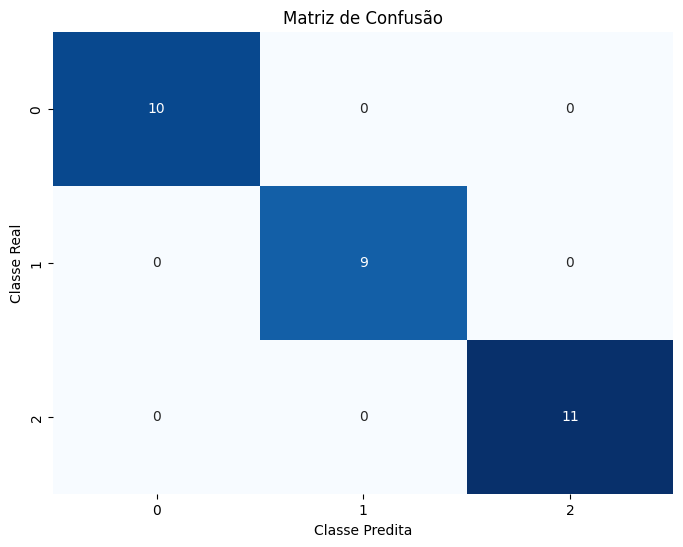

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0


In [26]:
#Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred)

#Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

#Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

#Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Novamente, os valores deram 1.0 (100% de predição correta) porque a base de dados era muito pequena, assim a regressão não correu o risco de falsos verdadeiros ou falsos negativos, tendo precisão e exatidão nos valores preditos.

### Utilizando o dataset load_digits. Exemplo de como fazer a importação do dataset usando o sklearn:

```from sklearn.datasets import load_digits```
```digits = load_digits()```

### Responda:


In [27]:
#Importação do valor
from sklearn.datasets import load_digits
digits = load_digits()

In [28]:
# Converter para um DataFrame
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# Adicionar a coluna alvo
df['target'] = digits.target

#### a. Faça uma análise inicial sobre esse dataset
i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [30]:
# Verificar quantos dados possui
print('O número de linhas presentes no dataframe:', df.shape[0])
print('O número de colunas existentes no dataframe: ', df.shape[1])

O número de linhas presentes no dataframe: 1797
O número de colunas existentes no dataframe:  65


In [ ]:
# Verificar a existência de dados nulos
dados_nulos = df.isnull().any().sum()

if dados_nulos > 0:
    print(f'Existem dados nulos no dataframe, sendo {dados_nulos} dados nulos.')
else:
    print('Não existem dados nulos no dataframe')

Não existem dados nulos no dataframe


In [31]:
# Verificar se existem dados categóricos
dados_categoricos = df.select_dtypes(include='object').columns
dados_categoricos
#Não existem dados categóricos

Index([], dtype='object')

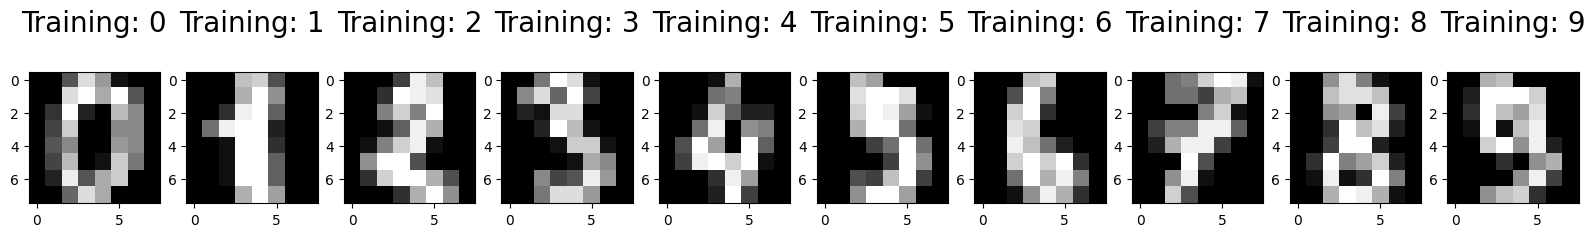

In [32]:
#Verificação visual dos valores distribuidos no dataframe
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
# Verificar se todos os dados são numéricos
df.dtypes.value_counts()

float64    64
int32       1
Name: count, dtype: int64

In [44]:
#Verificação da base de dados presente em busca de desbalanceamento
df.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

####  b. Aplique a regressão logística para avaliar o modelo de classificação.


In [33]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir os dados em características (X) e rótulos (y)
X = digits.data
y = digits.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística com um max_iter alto
log_reg = LogisticRegression(max_iter=10000)

# Treinar o modelo
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Foi criado o modelo de regressão logística, onde utilizou-se 20% de base de dados para teste e 80% para treino, e utilizou-se a max_iter=10000 para limitar o número de iterações máximas. O parâmetro max_iter na classe LogisticRegression do sklearn define o número máximo de iterações que o algoritmo de otimização pode realizar durante o ajuste do modelo. (pois, com número de iterações menor, foi perceptível o impacto na performance do modelo, onde houve uma diferença significativa na acurácia).

#### c. Calcule a acurácia, precisão e recall

In [35]:
# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Verificação, utilizando o classification_report, sobre a predição e o modelo.
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.98      0.99        60
           5       0.94      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.91      0.98      0.94        43
           9       0.98      0.95      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [37]:
# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 0.9722222222222222
Precisão: 1.0
Recall: 1.0


Ao observar toda a métrica presente, o modelo indica ser bem representativo e com uma boa previsão de valores de acordo com as variáveis entregues.

#### d. Plote a matriz de confusão com matplotlib ou seaborn


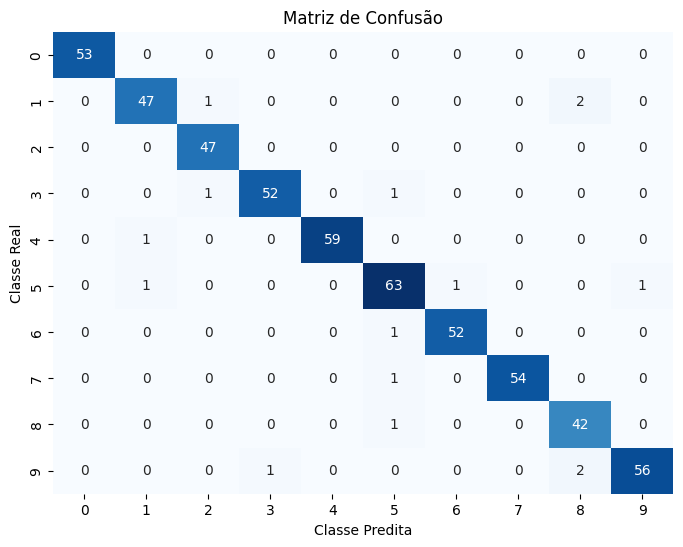

In [38]:
# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

Corroborando com os valores de precisão e acurácia e recall, o número de sucessos para cada hipótese testada foi majoritariamente um verdadeiro positivo, indicando um bom modelo logístico.